# Exploratory Data Analysis

In [20]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

### 1. Importing 

In [21]:
rawData = pd.read_csv("/Users/skhiearth/Desktop/Reddit-Flair-Detection/RedditData/Data/Reddit.csv")

rawData = rawData[rawData['Flair'].notna()] # Dropping all submissions that don't have a tagged flair
rawData["Body"].fillna("", inplace = True)
rawData["Title"].fillna("", inplace = True)

rawData["text"] = rawData["Title"] + " " + rawData["Body"]

rawData.drop(['Post ID', 'Author', 'Permalink'], axis = 1, inplace=True) 
rawData.rename(columns = {'Flair':'flair'}, inplace = True) 
rawData.head(3)

,Title,Url,Score,Publish Date,Total No. of Comments,flair,Body,text
0,Would Gandhi be called an anti national in 201...,https://www.reddit.com/r/india/comments/ar3328...,263,2019-02-16 05:39:47,136,AskIndia,,Would Gandhi be called an anti national in 201...
1,MISSING PERSON IN RISHIKESH,https://www.reddit.com/r/india/comments/ar37hd...,124,2019-02-16 05:52:42,7,AskIndia,New York resident Harris Pike is [missing](htt...,MISSING PERSON IN RISHIKESH New York resident ...
2,Unregistered driver rapes 26-year-old tech fir...,https://www.hindustantimes.com/noida/unregiste...,123,2019-02-16 06:02:25,43,[R]eddiquette,,Unregistered driver rapes 26-year-old tech fir...


In [22]:
print("The cleaned data has {} rows and {} columns.".format(rawData.shape[0], rawData.shape[1]))

The cleaned data has 19695 rows and 8 columns.


### 2. Class Imbalance

We check for Class (Flair) Imbalance in the dataset. Lot of submissions with similar flairs and if there are certain flairs with very few rows, it will lead to low accuracy in the classification, so we can elimiate this by two methods: either by getting more data (taken care of in the scraping script) and by considering only popular flairs.

In [23]:
# Get list of all Flair values in the dataframe

flairs = []

column_values = rawData['flair'].values
unique_values =  np.unique(column_values)

for _flair in unique_values:
    flairs.append(_flair)

len(flairs)

31

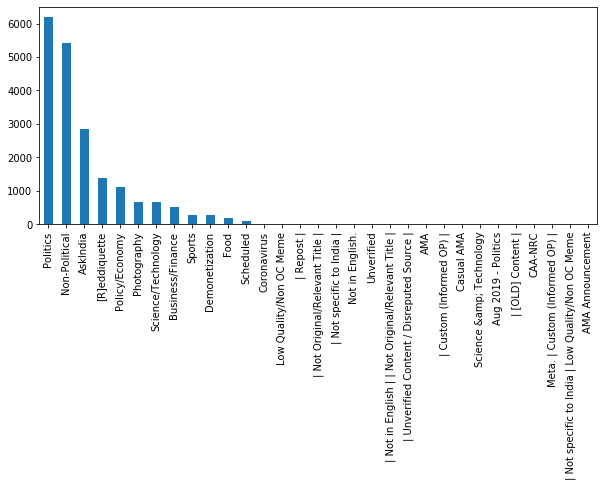

In [24]:
plt.figure(figsize=(10,4))
rawData.flair.value_counts().plot(kind='bar');

The class imbalance is very clear in this plot. So, we keep the top 5 classes (becase they have more than 1000) submissions associated with them.

In [34]:
# Top 10 most frequent flairs

flairs = []

for key in rawData.flair.value_counts().head(5).keys():
    flairs.append(key)

rawData = rawData.loc[rawData['flair'].isin(flairs)];

rawData.to_csv('/Users/skhiearth/Desktop/Reddit-Flair-Detection/RedditData/Data/balanced.csv', 
               header=True, index=False) 

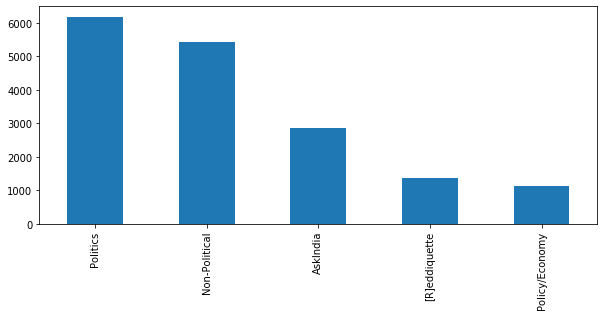

In [35]:
plt.figure(figsize=(10,4))
rawData.flair.value_counts().plot(kind='bar');